In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from urllib.request import urlopen
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from datetime import datetime
import time 
import re

In [2]:
driver = webdriver.Chrome('C:/Users/user/Downloads/chromedriver_win32/chromedriver')
driver.implicitly_wait(3)

In [3]:
url='https://imnews.imbc.com/more/search/?mainSearch=%EA%B2%BD%EC%A0%9C#page=0'
driver.get(url)

In [28]:
last_page_height = driver.execute_script("return document.documentElement.scrollHeight")
while True: 
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(3.0)
    new_page_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_page_height == last_page_height:
        break
    last_page_height = new_page_height

In [29]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [33]:
soup

<html class="mobile" lang="ko"><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0,user-scalable=no" name="viewport"/>
<meta content="MBC NEWS" name="title"/>
<meta content="http://imnews.imbc.com/" name="url"/>
<meta content="기본과 원칙에 충실한 뉴스" name="description"/>
<meta content="http://imnews.imbc.com/" property="og:url"/>
<meta content="MBC NEWS" property="og:title"/>
<meta content="기본과 원칙에 충실한 뉴스" property="og:description"/>
<meta content="MBC NEWS" property="og:site_name"/>
<meta content="http://img.imnews.imbc.com/images/2015/MBCNEWS_logo.png" property="og:image"/>
<meta content="https://www.facebook.com/MBCnews" property="article:publisher"/>
<meta content="ko_KR" property="og:locale"/>
<meta content="692275414241491" property="fb:app_id"/>
<meta content="@mbcnews" name="twitter:site"/>
<meta content="MBC NEWS" itemprop="name"/>
<meta content="기본과 원칙에 충실한 뉴스" it

In [63]:
temp=soup.select('div#container > div')

In [74]:
ss=soup.findAll('span', {'class':'tit ellipsis2'})

In [4]:

def crawling():
    title=[]
    for page in range(1,90):#페이지 돌면서 크롤링
        driver = webdriver.Chrome('C:/Users/user/Downloads/chromedriver_win32/chromedriver')
        driver.implicitly_wait(1)
        url='https://imnews.imbc.com/more/search/?mainSearch=%EA%B2%BD%EC%A0%9C#page='+str(page)
        driver.get(url)
        last_page_height = driver.execute_script("return document.documentElement.scrollHeight")
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(1.0)
        new_page_height = driver.execute_script("return document.documentElement.scrollHeight")
        
        last_page_height = new_page_height
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        ss=soup.findAll('span', {'class':'tit ellipsis2'})
        for s in range(0,len(ss)):
            title.append(ss[s].text)
    return title
temp=crawling()

In [5]:
print(temp)

['산후조리원·유치원 정보 한눈에…열린소비자포털로 통합', '코스피·코스닥 모두 1% 가까이 상승', '카드업계, 수해 고객에 대금 청구유예 등 금융지원', '폭우로 가축 30만마리 폐사하고 농작물 6천㏊ 침수', '공공재건축 사례 발굴 착수…과열 개발예정지 기획조사', '김현미 "전월세전환율 4.0% 너무 높아…개정할 것"', '법원, 옵티머스 김재현 대표에 6894억원 추징보전 명령', '코스피·코스닥 강보합권 거래…개인 사자세', '국토부 1차관 "공공재건축 서울시와 이견 없어"', '외국인 아파트 취득 늘자…여당 "실거주 않으면 중과세" 입법 추진', '정부 "9억 이상 고가주택 매매 자금출처 의심거래 상시조사"', '[스마트리빙] 여름철 양파, 망에 담아 놓으면 금방 상해요', '[스마트리빙] 장마철 반려견 사료 어떻게 보관할까?', '새 단장 끝낸 모란시장…특화거리 재도약', '국제 금값, 사상 첫 온스당 2천 달러 돌파', '"휴가 가려 샀더니"…캠핑 용품, 유해물질 검출', '공급 충분하다더니…투기 자극 우려 없나?', '국제금값, 사상 첫 온스당 2천달러 돌파', '[이 시각 세계] 필리핀 코로나19 급증세…마닐라 등 준봉쇄령', '[뉴스 열어보기] "커피숍 입장부터 주문까지 마스크 착용"...커피숍 방역수칙 강화', '"50층 줄게 50% 다오"…시장 반응은 \'글쎄\'', "수도권 '13만 호' 공급…50층 재건축도 허용", '일본제철 \'자산압류\' 오늘부터…"강제 매각 시 보복"', '홍콩 무역금융 사모펀드 610억 환매, 내년 5월까지 연기', "'월세 전환' 커지는 우려…'전월세 전환율' 낮아질까?", "TV조선 '방정오 3백 억 몰아주기?'…공정위 조사", '공급 충분하다더니…투기심리 자극 우려 없나?', '"50층 줄게 50% 다오"…강남 재건축 시장 "글쎄"', "공공지·유휴지 긁어 모아…수도권 '13만 호'", '정부 "공공재건축 최대 50층 허용, 정부-서울시 이견 없다"', '금통위원들 "완화적 통화정책 따른 자산 버블 우

In [6]:
print(len(temp))

445


In [7]:
from konlpy.tag import Mecab
mecab = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")
import pandas as pd
df= pd.DataFrame(temp)

In [9]:
df.to_csv('newTitle.csv',encoding='utf-8-sig')

In [35]:
df

,0
0,산후조리원·유치원 정보 한눈에…열린소비자포털로 통합
1,코스피·코스닥 모두 1% 가까이 상승
2,"카드업계, 수해 고객에 대금 청구유예 등 금융지원"
3,폭우로 가축 30만마리 폐사하고 농작물 6천㏊ 침수
4,공공재건축 사례 발굴 착수…과열 개발예정지 기획조사
...,...
440,中 기록적 홍수로 수재민 4천500만명…재산피해 20조원 육박
441,강남권 토지거래허가제 한 달…주택 거래 93% 급감
442,세입자 없는 집 임대등록 때 임대료 상한 명시해야
443,7·10대책 이후 서울 아파트값 상승폭 둔화…전세난은 심화


{'코로나': 26, '주택': 21, '코스피': 19, '상승': 19, '아파트': 18, '공급': 18, '서울': 18, '경제': 18, '부동산': 16, '수도': 15, '스마트': 14, '최대': 14, '외국인': 13, '정부': 13, '층': 13, '투자': 13, '집': 13, '리빙': 12, '뉴스': 12, '법': 12, '개월': 12, '최고': 12, '분기': 12, '시행': 12, '증가': 11, '상반기': 11, '조사': 10, '시장': 10, '발표': 10, '대책': 10, '하락': 10, '금융': 9, '김현미': 9, '금값': 9, '사상': 9, '일': 9, '감소': 9, '주': 9, '뉴스터치': 9, '피해': 9, '집값': 9, '대출': 9, '통합': 8, '전월세': 8, '전환': 8, '돌파': 8, '우려': 8, '호': 8, '오늘': 8, '공공': 8, '기업': 8, '검토': 8, '임대': 8, '증시': 8, '배': 8, '국내': 8, '위': 8, '지원': 7, '것': 7, '거래': 7, '개인': 7, '허용': 7, '펀드': 7, '마감': 7, '이슈': 7, '완전': 7, '정복': 7, '인수': 7, '민주': 7, '통과': 7, '역대': 7, '트럼프': 7, '달': 7, '네이버': 7, '美': 7, '개': 7, '올해': 7, '검찰': 7, '수사': 7, '성장률': 7, '연속': 7, '수': 7, '합의': 7, '택지': 7, '소비자': 6, '국제': 6, '세계': 6, '매각': 6, '정책': 6, '경기': 6, '가능': 6, '전세': 6, '폭': 6, '경실련': 6, '갭': 6, '대통령': 6, '반발': 6, '작년': 6, '수출': 6, '계약': 6}


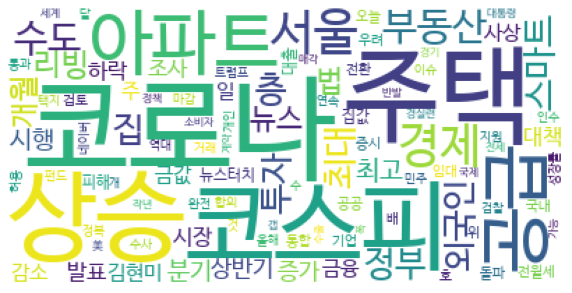

In [16]:
galexy_posts = df.get(0)


galexy_stop_words = "외 등 만 명 원 천 억 년 월 대 중 조"
galexy_stop_words = galexy_stop_words.split(' ')
galexy_stop_words[0:10]

# 불용어 제거
galexy_nouns = []
for post in galexy_posts:
    for noun in mecab.nouns(post):
        if noun not in galexy_stop_words:
            galexy_nouns.append(noun)

galexy_nouns[0:10]

from collections import Counter
num_top_nouns = 100
galexy_nouns_counter = Counter(galexy_nouns)
galexy_top_nouns = dict(galexy_nouns_counter.most_common(num_top_nouns))
print(galexy_top_nouns)

from wordcloud import WordCloud
galexy_wc = WordCloud(background_color="white", font_path='./Downloads/nlp_class_day2-master/nlp_class_day2-master/font/NanumBarunGothic.ttf')
galexy_wc.generate_from_frequencies(galexy_top_nouns)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(galexy_wc)

In [141]:
galexy_nouns

['日',
 '정부',
 '강제',
 '징용',
 '기업',
 '자산',
 '매각',
 '시',
 '선택지',
 '시야',
 '코스피',
 '상승세',
 '일',
 '약품',
 '상한가',
 '기록',
 '공공',
 '재건축',
 '층',
 '허용',
 '수도',
 '만',
 '호',
 '공급',
 '일본',
 '언론',
 '징용',
 '기업',
 '자산',
 '매각',
 '땐',
 '금융',
 '제재',
 '검토',
 '김종인',
 '법',
 '우격다짐',
 '부동산',
 '투기',
 '공공',
 '재건축',
 '층',
 '허용',
 '태릉',
 '서울',
 '조달청',
 '부지',
 '개발',
 '김태년',
 '부동산',
 '폭',
 '등',
 '뒤',
 '경제',
 '위기',
 '엄습',
 '과열',
 '조기',
 '진압',
 '경실련',
 '의료',
 '전면',
 '파업',
 '부적',
 '절',
 '정부',
 '업무',
 '개시',
 '명령',
 '발동',
 '홍남기',
 '주택',
 '부지',
 '태릉',
 '골프장',
 '검토',
 '벨트',
 '선정',
 '코스피',
 '선',
 '회복',
 '건설',
 '주',
 '강세',
 '취업',
 '대신',
 '창',
 '농',
 '열대작물',
 '내',
 '손',
 '외국인',
 '갭',
 '투자',
 '투명',
 '자금',
 '세무',
 '조사',
 '부',
 '오늘',
 '주요',
 '뉴스',
 '시각',
 '세계',
 '日',
 '코로나',
 '누적',
 '확진',
 '만',
 '명',
 '뉴스터치',
 '세입자',
 '계약서',
 '집',
 '주인',
 '뉴스터치',
 '열화상',
 '카메라',
 '접촉',
 '기침',
 '인식',
 '뉴스터치',
 '자차',
 '가입',
 '규정',
 '보험금',
 '청구',
 '아시아',
 '인수',
 '무산',
 '산',
 '현대산업개발',
 '책임',
 '부',
 '오늘',
 '주요',
 '뉴스',
 '수도',
 '공급',
 '대책',
 '발표',
 '만

In [12]:
token

NameError: name 'token' is not defined

In [19]:
from konlpy.tag import Okt
tokenizer = Okt()  
tokens = tokenizer.morphs(tokens)

In [18]:
tokens=""
for s in temp:
    tokens+=s+" "
print(tokens)

산후조리원·유치원 정보 한눈에…열린소비자포털로 통합 코스피·코스닥 모두 1% 가까이 상승 카드업계, 수해 고객에 대금 청구유예 등 금융지원 폭우로 가축 30만마리 폐사하고 농작물 6천㏊ 침수 공공재건축 사례 발굴 착수…과열 개발예정지 기획조사 김현미 "전월세전환율 4.0% 너무 높아…개정할 것" 법원, 옵티머스 김재현 대표에 6894억원 추징보전 명령 코스피·코스닥 강보합권 거래…개인 사자세 국토부 1차관 "공공재건축 서울시와 이견 없어" 외국인 아파트 취득 늘자…여당 "실거주 않으면 중과세" 입법 추진 정부 "9억 이상 고가주택 매매 자금출처 의심거래 상시조사" [스마트리빙] 여름철 양파, 망에 담아 놓으면 금방 상해요 [스마트리빙] 장마철 반려견 사료 어떻게 보관할까? 새 단장 끝낸 모란시장…특화거리 재도약 국제 금값, 사상 첫 온스당 2천 달러 돌파 "휴가 가려 샀더니"…캠핑 용품, 유해물질 검출 공급 충분하다더니…투기 자극 우려 없나? 국제금값, 사상 첫 온스당 2천달러 돌파 [이 시각 세계] 필리핀 코로나19 급증세…마닐라 등 준봉쇄령 [뉴스 열어보기] "커피숍 입장부터 주문까지 마스크 착용"...커피숍 방역수칙 강화 "50층 줄게 50% 다오"…시장 반응은 '글쎄' 수도권 '13만 호' 공급…50층 재건축도 허용 일본제철 '자산압류' 오늘부터…"강제 매각 시 보복" 홍콩 무역금융 사모펀드 610억 환매, 내년 5월까지 연기 '월세 전환' 커지는 우려…'전월세 전환율' 낮아질까? TV조선 '방정오 3백 억 몰아주기?'…공정위 조사 공급 충분하다더니…투기심리 자극 우려 없나? "50층 줄게 50% 다오"…강남 재건축 시장 "글쎄" 공공지·유휴지 긁어 모아…수도권 '13만 호' 정부 "공공재건축 최대 50층 허용, 정부-서울시 이견 없다" 금통위원들 "완화적 통화정책 따른 자산 버블 우려" 경기 회복 기대감에 코스피 오름세…양 시장 상승 마감 공공 재건축 50층 허용…수도권 13만 호 공급 서울시 "공공재건축 방안에 찬성 안 해"…"높이도 35층까지" 캠

In [13]:
type(galexy_nouns)

list

In [155]:
type(tokens)

list

In [22]:
sentences

['산후조리원 · 유치원 정보 한눈 에 … 열린 소비자 포털 로 통합 코스피 · 코스닥 모두 1% 가까이 상승 카드 업계 , 수해 고객 에 대금 청구 유예 등 금융 지원 폭우 로 가축 30만 마리 폐 사하고 농작물 6천 ㏊ 침수 공공 재건축 사례 발굴 착수 … 과열 개발 예정 지 기획 조사 김현미 " 전월세 전환율 4.0% 너무 높아 … 개정 할 것 " 법원 , 옵티머스 김재현 대표 에 6894억원 추징 보전 명령 코스피 · 코스닥 강 보합 권 거래 … 개인 사 자세 국토부 1 차관 " 공공 재건축 서울시 와 이견 없어 " 외국인 아파트 취득 늘자 … 여당 " 실 거주 않으면 중과세 " 입법 추진 정부 " 9억 이상 고가 주택 매매 자금 출처 의심 거래 상 시조사 " [ 스마트리빙 ] 여름철 양파 , 망 에 담아 놓으면 금방 상해 요 [ 스마트리빙 ] 장마철 반려견 사료 어떻게 보관 할까 ? 새 단장 끝낸 모란시장 … 특 화 거리 재 도약 국제 금값 , 사상 첫 온스 당 2천 달러 돌파 " 휴가 가려 샀더니 "… 캠핑 용품 , 유해 물질 검 출 공급 충분하다더니 … 투기 자극 우려 없나 ? 국제 금값 , 사상 첫 온스 당 2천달러 돌파 [ 이 시각 세계 ] 필리핀 코로나 19 급증 세 … 마닐라 등 준 봉쇄 령 [ 뉴스 열어 보기 ] " 커피숍 입장 부터 주문 까지 마스크 착용 "... 커피숍 방역 수 칙 강화 " 50 층 줄 게 50% 다오 "… 시장 반응 은 \' 글쎄 \' 수도권 \' 13만 호 \' 공급 … 50 층 재건축 도 허용 일본 제철 \' 자산 압류 \' 오늘 부터 …" 강제 매각 시 보복 " 홍콩 무역 금융 사모펀드 610억 환매 , 내년 5월 까지 연기 \' 월세 전환 \' 커지는 우려 …\' 전월세 전환율 \' 낮아질까 ? TV 조선 \' 방정오 3 백 억 몰아주기 ?\'… 공정위 조사 공급 충분하다더니 … 투기 심리 자극 우려 없나 ? " 50 층 줄 게 50% 다오 "… 강남 재건축 시장 " 글쎄 " 공공 지 · 유 휴지 긁어 모아 …

In [125]:
galexy_posts

0             김종인 "법으로 우격다짐해도 부동산 투기 못잡아"
1        공공 재건축 50층까지 허용…태릉CC·서울조달청 부지 개발
2      김태년 "부동산 폭등 뒤엔 경제위기 엄습…과열 조기 진압해야"
3      경실련 "의료계 전면파업 부적절…정부, 업무개시명령 발동하라"
4      홍남기 "주택부지 태릉골프장만 검토…그외 그린벨트 선정 안해"
                      ...                
555           김종인 "법으로 우격다짐해도 부동산 투기 못잡아"
556      공공 재건축 50층까지 허용…태릉CC·서울조달청 부지 개발
557    김태년 "부동산 폭등 뒤엔 경제위기 엄습…과열 조기 진압해야"
558    경실련 "의료계 전면파업 부적절…정부, 업무개시명령 발동하라"
559    홍남기 "주택부지 태릉골프장만 검토…그외 그린벨트 선정 안해"
Name: 0, Length: 560, dtype: object

In [150]:
sentences

['김종인 법 우격다짐 부동산 투기 공공 재건축 층 허용 태릉 서울 조달청 부지 개발 김태년 부동산 폭 등 뒤 경제 위기 엄습 과열 조기 진압 경실련 의료 전면 파업 부적 절 정부 업무 개시 명령 발동 홍남기 주택 부지 태릉 골프장 검토 벨트 선정 김종인 법 우격다짐 부동산 투기 공공 재건축 층 허용 태릉 서울 조달청 부지 개발 김태년 부동산 폭 등 뒤 경제 위기 엄습 과열 조기 진압 경실련 의료 전면 파업 부적 절 정부 업무 개시 명령 발동 홍남기 주택 부지 태릉 골프장 검토 벨트 선정 김종인 법 우격다짐 부동산 투기 공공 재건축 층 허용 태릉 서울 조달청 부지 개발 김태년 부동산 폭 등 뒤 경제 위기 엄습 과열 조기 진압 경실련 의료 전면 파업 부적 절 정부 업무 개시 명령 발동 홍남기 주택 부지 태릉 골프장 검토 벨트 선정 김종인 법 우격다짐 부동산 투기 공공 재건축 층 허용 태릉 서울 조달청 부지 개발 김태년 부동산 폭 등 뒤 경제 위기 엄습 과열 조기 진압 경실련 의료 전면 파업 부적 절 정부 업무 개시 명령 발동 홍남기 주택 부지 태릉 골프장 검토 벨트 선정 김종인 법 우격다짐 부동산 투기 공공 재건축 층 허용 태릉 서울 조달청 부지 개발 김태년 부동산 폭 등 뒤 경제 위기 엄습 과열 조기 진압 경실련 의료 전면 파업 부적 절 정부 업무 개시 명령 발동 홍남기 주택 부지 태릉 골프장 검토 벨트 선정 김종인 법 우격다짐 부동산 투기 공공 재건축 층 허용 태릉 서울 조달청 부지 개발 김태년 부동산 폭 등 뒤 경제 위기 엄습 과열 조기 진압 경실련 의료 전면 파업 부적 절 정부 업무 개시 명령 발동 홍남기 주택 부지 태릉 골프장 검토 벨트 선정 김종인 법 우격다짐 부동산 투기 공공 재건축 층 허용 태릉 서울 조달청 부지 개발 김태년 부동산 폭 등 뒤 경제 위기 엄습 과열 조기 진압 경실련 의료 전면 파업 부적 절 정부 업무 개시 명령 발동 홍남기 주택 부지 태릉 골프장 검토 벨트 선정 김종인 법 우격다짐 부동산 투기 공공 재건축 층 허용 태릉 서울 조달청

In [20]:
# 토큰을 문자열로 변환
sentence = " ".join(tokens)

# CountVectorizer의 입력에 맞게 배열로 변경
sentences = []
sentences.append(sentence)

from sklearn.feature_extraction.text import CountVectorizer


# 1글자도 인식이 되도록 토큰 패턴 변경
cv = CountVectorizer(token_pattern = r"(?u)\b\w+\b")
cv.fit(sentences)

def convert_cv(sentence, cv):
    
    # 문장을 토큰으로 분리
    tokenizer = Okt()
    tokens = tokenizer.morphs(sentence)
    
    # 토큰을 문자열로 변환
    sentence = " ".join(tokens)
    
    # CountVectorizer의 입력에 맞게 배열로 변경
    sentences = []
    sentences.append(sentence)
    
    # 벡터 변환
    vector = cv.transform(sentences).toarray()    
    
    return vector


In [21]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
from konlpy.tag import Okt
tokenizer = Okt()  
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))
bigNum=0
temp_string=""
def comParedTo(sbsString):
    bigNum=0
    for post in galexy_posts:
        temp_num=cos_sim(convert_cv(sbsString,cv)[0],convert_cv(post,cv)[0])
        if(temp_num>bigNum):
            bigNum=temp_num
            temp_string=post
    print(temp_string)
ass='일본 언론 징용 기업 자ㅡㅡㅡ산 매각 땐 금융제재까지 검토'
comParedTo(ass)

일본 언론 "징용기업 자산 매각 땐 금융제재까지 검토"


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(token_pattern = r"(?u)\b\w+\b")

tf_idf.fit(temp)

print(tf_idf.vocabulary_)


{'산후조리원': 1066, '유치원': 1495, '정보': 1699, '한눈에': 2030, '열린소비자포털로': 1398, '통합': 1944, '코스피': 1912, '코스닥': 1910, '모두': 815, '1': 3, '가까이': 256, '상승': 1078, '카드업계': 1892, '수해': 1214, '고객에': 374, '대금': 670, '청구유예': 1846, '등': 730, '금융지원': 501, '폭우로': 1998, '가축': 269, '30만마리': 90, '폐사하고': 1985, '농작물': 620, '6천': 176, '침수': 1890, '공공재건축': 401, '사례': 1039, '발굴': 903, '착수': 1821, '과열': 421, '개발예정지': 295, '기획조사': 545, '김현미': 554, '전월세전환율': 1681, '4': 122, '0': 0, '너무': 596, '높아': 622, '개정할': 303, '것': 327, '법원': 941, '옵티머스': 1433, '김재현': 549, '대표에': 689, '6894억원': 168, '추징보전': 1875, '명령': 811, '강보합권': 284, '거래': 309, '개인': 300, '사자세': 1054, '국토부': 462, '1차관': 51, '서울시와': 1107, '이견': 1527, '없어': 1362, '외국인': 1444, '아파트': 1309, '취득': 1885, '늘자': 639, '여당': 1372, '실거주': 1271, '않으면': 1331, '중과세': 1764, '입법': 1603, '추진': 1874, '정부': 1701, '9억': 211, '이상': 1542, '고가주택': 372, '매매': 797, '자금출처': 1614, '의심거래': 1520, '상시조사': 1084, '스마트리빙': 1224, '여름철': 1376, '양파': 1343, '망에': 789, '담아': 662, '놓으면': 627, '

In [29]:
len(galexy_posts)

445

In [30]:
print(pd.DataFrame(tf_idf.transform(galexy_posts).toarray()).shape)

(445, 2139)


In [31]:

tf_idf_matrix = tf_idf.fit_transform(galexy_posts)

In [33]:
print(tf_idf_matrix.shape)

(445, 2139)


In [34]:
from sklearn.metrics.pairwise import linear_kernel

# 10000 x 10000을 서로 내적하여 코사인 유사도를 구함
# 각 항목은 두 영화의 유사도를 나타냄
cosine_sim = linear_kernel(tf_idf_matrix, tf_idf_matrix)

# print(cosine_sim.shape)
cosine_sim[0]
# list(enumerate(cosine_sim[0]))

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.14147101,
       0.        , 0.        , 0.        , 0.        , 0.     

In [82]:

indices = pd.Series(data=df[0],name="title").drop_duplicates()
indices = pd.DataFrame(indices)

In [83]:
indices

,title
0,산후조리원·유치원 정보 한눈에…열린소비자포털로 통합
1,코스피·코스닥 모두 1% 가까이 상승
2,"카드업계, 수해 고객에 대금 청구유예 등 금융지원"
3,폭우로 가축 30만마리 폐사하고 농작물 6천㏊ 침수
4,공공재건축 사례 발굴 착수…과열 개발예정지 기획조사
...,...
440,中 기록적 홍수로 수재민 4천500만명…재산피해 20조원 육박
441,강남권 토지거래허가제 한 달…주택 거래 93% 급감
442,세입자 없는 집 임대등록 때 임대료 상한 명시해야
443,7·10대책 이후 서울 아파트값 상승폭 둔화…전세난은 심화


In [84]:
indices.loc[[1,2,3,4]]

,title
1,코스피·코스닥 모두 1% 가까이 상승
2,"카드업계, 수해 고객에 대금 청구유예 등 금융지원"
3,폭우로 가축 30만마리 폐사하고 농작물 6천㏊ 침수
4,공공재건축 사례 발굴 착수…과열 개발예정지 기획조사


In [105]:
# 유사한 영화를 구함
def get_similar(title, indices, cosine_sim):

    # 영화의 인덱스를 구함
    try:
        index = indices[indices['title']==title].index[0]
    except:
        return None
    
    # 해당 영화의 유사도를 배열로 변환
    # 0 : 인덱스, 1 : 유사도
    scores = list(enumerate(cosine_sim[index]))

    # 유사도(x[1] 항목)를 기준으로 높은 순으로 정렬
    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    # 가장 유사도가 높은 자신을 제외하고 5개를 추출
    scores = scores[1:6]
    #print(scores)
    # 인덱스를 구함
    index = [x[0] for x in scores]
    #print(index)
    #print(type(index))
    # 각 인덱스의 영화 제목을 구함
    print(indices.loc[index])

In [106]:
get_similar("산후조리원·유치원 정보 한눈에…열린소비자포털로 통합", indices, cosine_sim)

                             title
422  공공기관 정보 시스템, 2025년까지 클라우드로 전환
301       민주 "시간 끌지 않겠다"…통합 '오락가락'
69        속도내는 민주·반발하는 통합…후속 법안 통과
1             코스피·코스닥 모두 1% 가까이 상승
2      카드업계, 수해 고객에 대금 청구유예 등 금융지원


In [107]:
sentences

['산후조리원 · 유치원 정보 한눈 에 … 열린 소비자 포털 로 통합 코스피 · 코스닥 모두 1% 가까이 상승 카드 업계 , 수해 고객 에 대금 청구 유예 등 금융 지원 폭우 로 가축 30만 마리 폐 사하고 농작물 6천 ㏊ 침수 공공 재건축 사례 발굴 착수 … 과열 개발 예정 지 기획 조사 김현미 " 전월세 전환율 4.0% 너무 높아 … 개정 할 것 " 법원 , 옵티머스 김재현 대표 에 6894억원 추징 보전 명령 코스피 · 코스닥 강 보합 권 거래 … 개인 사 자세 국토부 1 차관 " 공공 재건축 서울시 와 이견 없어 " 외국인 아파트 취득 늘자 … 여당 " 실 거주 않으면 중과세 " 입법 추진 정부 " 9억 이상 고가 주택 매매 자금 출처 의심 거래 상 시조사 " [ 스마트리빙 ] 여름철 양파 , 망 에 담아 놓으면 금방 상해 요 [ 스마트리빙 ] 장마철 반려견 사료 어떻게 보관 할까 ? 새 단장 끝낸 모란시장 … 특 화 거리 재 도약 국제 금값 , 사상 첫 온스 당 2천 달러 돌파 " 휴가 가려 샀더니 "… 캠핑 용품 , 유해 물질 검 출 공급 충분하다더니 … 투기 자극 우려 없나 ? 국제 금값 , 사상 첫 온스 당 2천달러 돌파 [ 이 시각 세계 ] 필리핀 코로나 19 급증 세 … 마닐라 등 준 봉쇄 령 [ 뉴스 열어 보기 ] " 커피숍 입장 부터 주문 까지 마스크 착용 "... 커피숍 방역 수 칙 강화 " 50 층 줄 게 50% 다오 "… 시장 반응 은 \' 글쎄 \' 수도권 \' 13만 호 \' 공급 … 50 층 재건축 도 허용 일본 제철 \' 자산 압류 \' 오늘 부터 …" 강제 매각 시 보복 " 홍콩 무역 금융 사모펀드 610억 환매 , 내년 5월 까지 연기 \' 월세 전환 \' 커지는 우려 …\' 전월세 전환율 \' 낮아질까 ? TV 조선 \' 방정오 3 백 억 몰아주기 ?\'… 공정위 조사 공급 충분하다더니 … 투기 심리 자극 우려 없나 ? " 50 층 줄 게 50% 다오 "… 강남 재건축 시장 " 글쎄 " 공공 지 · 유 휴지 긁어 모아 …

In [166]:
temp_list=[]
for sen in temp:
    temp_list.append(tokenizer.morphs(sen))

In [167]:
temp_list

[['산후조리원', '·', '유치원', '정보', '한눈', '에', '…', '열린', '소비자', '포털', '로', '통합'],
 ['코스피', '·', '코스닥', '모두', '1%', '가까이', '상승'],
 ['카드', '업계', ',', '수해', '고객', '에', '대금', '청구', '유예', '등', '금융', '지원'],
 ['폭우', '로', '가축', '30만', '마리', '폐', '사하고', '농작물', '6천', '㏊', '침수'],
 ['공공', '재건축', '사례', '발굴', '착수', '…', '과열', '개발', '예정', '지', '기획', '조사'],
 ['김현미', '"', '전월세', '전환율', '4.0%', '너무', '높아', '…', '개정', '할', '것', '"'],
 ['법원', ',', '옵티머스', '김재현', '대표', '에', '6894억원', '추징', '보전', '명령'],
 ['코스피', '·', '코스닥', '강', '보합', '권', '거래', '…', '개인', '사', '자세'],
 ['국토부', '1', '차관', '"', '공공', '재건축', '서울시', '와', '이견', '없어', '"'],
 ['외국인',
  '아파트',
  '취득',
  '늘자',
  '…',
  '여당',
  '"',
  '실',
  '거주',
  '않으면',
  '중과세',
  '"',
  '입법',
  '추진'],
 ['정부',
  '"',
  '9억',
  '이상',
  '고가',
  '주택',
  '매매',
  '자금',
  '출처',
  '의심',
  '거래',
  '상',
  '시조사',
  '"'],
 ['[', '스마트리빙', ']', '여름철', '양파', ',', '망', '에', '담아', '놓으면', '금방', '상해', '요'],
 ['[', '스마트리빙', ']', '장마철', '반려견', '사료', '어떻게', '보관', '할까', '?'],
 ['새', '단장', '끝

In [191]:
import gensim.models

model = gensim.models.Word2Vec(sentences=temp_list,size=300,window=2,min_count=1)

In [192]:
word_vector=model.wv

In [197]:
print(len(word_vector.vocab.keys()))

2101


In [194]:
temp_list

[['산후조리원', '·', '유치원', '정보', '한눈', '에', '…', '열린', '소비자', '포털', '로', '통합'],
 ['코스피', '·', '코스닥', '모두', '1%', '가까이', '상승'],
 ['카드', '업계', ',', '수해', '고객', '에', '대금', '청구', '유예', '등', '금융', '지원'],
 ['폭우', '로', '가축', '30만', '마리', '폐', '사하고', '농작물', '6천', '㏊', '침수'],
 ['공공', '재건축', '사례', '발굴', '착수', '…', '과열', '개발', '예정', '지', '기획', '조사'],
 ['김현미', '"', '전월세', '전환율', '4.0%', '너무', '높아', '…', '개정', '할', '것', '"'],
 ['법원', ',', '옵티머스', '김재현', '대표', '에', '6894억원', '추징', '보전', '명령'],
 ['코스피', '·', '코스닥', '강', '보합', '권', '거래', '…', '개인', '사', '자세'],
 ['국토부', '1', '차관', '"', '공공', '재건축', '서울시', '와', '이견', '없어', '"'],
 ['외국인',
  '아파트',
  '취득',
  '늘자',
  '…',
  '여당',
  '"',
  '실',
  '거주',
  '않으면',
  '중과세',
  '"',
  '입법',
  '추진'],
 ['정부',
  '"',
  '9억',
  '이상',
  '고가',
  '주택',
  '매매',
  '자금',
  '출처',
  '의심',
  '거래',
  '상',
  '시조사',
  '"'],
 ['[', '스마트리빙', ']', '여름철', '양파', ',', '망', '에', '담아', '놓으면', '금방', '상해', '요'],
 ['[', '스마트리빙', ']', '장마철', '반려견', '사료', '어떻게', '보관', '할까', '?'],
 ['새', '단장', '끝

In [195]:
print(model.wv.most_similar(positive=['주식'], topn=5))

[('바다', 0.20314203202724457), ('한동훈', 0.19489645957946777), ('급매', 0.17980702221393585), ('전자통신', 0.17039009928703308), ('신혼부부', 0.1573154330253601)]
